<a href="https://colab.research.google.com/github/vcautela/SeriesTemporais_exercicio/blob/main/S%C3%A9riesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error

In [2]:
!pip install scipy

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.7 MB/s eta 0:00:00


In [4]:
from pmdarima.arima import auto_arima

In [6]:
df = pd.read_excel('/content/energy.xlsx', index_col="DATE", parse_dates=True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [9]:
df.shape

(408, 1)

In [10]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 1985-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  408 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [12]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [13]:
df.columns = ["producao"]

<Axes: xlabel='DATE'>

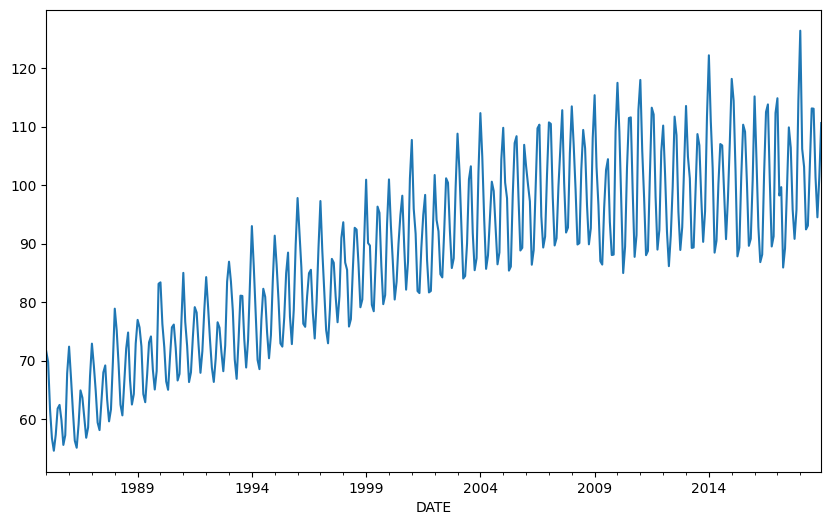

In [15]:
df['producao'].plot(figsize=(10,6))

<Figure size 800x600 with 0 Axes>

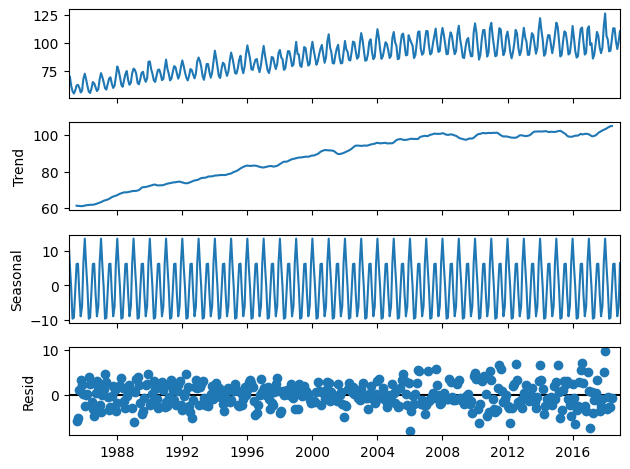

In [17]:
result = seasonal_decompose(df)

fig = plt.figure(figsize=(8,6))
fig = result.plot()

In [20]:
resultado = adfuller(df['producao'])
print(f'Teste ADF: {resultado[0]}')
print(f'P-value: {resultado[1]}')

Teste ADF: -2.252399047046594
P-value: 0.18777984601967806


Nesse caso com o Pvalue > 0.05 a Hipotese Nula é verdadeira, logo a série não é estacionária

In [22]:
resultado = adfuller(df['producao'].diff().dropna())
print(f'Teste ADF: {resultado[0]}')
print(f'P-value: {resultado[1]}')

Teste ADF: -7.450892277526341
P-value: 5.67456995585561e-11


Ao se fazer a diferenciação, retiramos o efeito acumulado da série e só mostramos a variação do período T contra o período T-1 ao longo de toda a série

In [26]:
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                       seasonal=True,
                       m=6,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       information_criterion="aic",
                       trace=True,
                       error_action="ignore",
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=1.02 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.35 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=0.58 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=1.10 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.87 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=3.58 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=2.55 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=0.83 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=1.35 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=1.16 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=2.29 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

In [28]:
#fit no modelo

model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,2,6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Thu, 04 Jan 2024   AIC                           1866.400
Time:                                        20:14:27   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.055      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.180      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
predicoes = resultado_sarimax.get_prediction(start=-12)
predicoes_media = predicoes.predicted_mean

In [31]:
intervalo_confianca = predicoes.conf_int()
limite_abaixo = intervalo_confianca.iloc[:,0]
limite_acima = intervalo_confianca.iloc[:,1]

limite_abaixo[0], limite_acima[0]

(115.1447404570401, 124.45517675290846)

In [32]:
predicoes_media[0]

119.79995860497428

In [34]:
datas_previsao = np.asarray(predicoes_media.index)
datas = np.asarray(df.index)

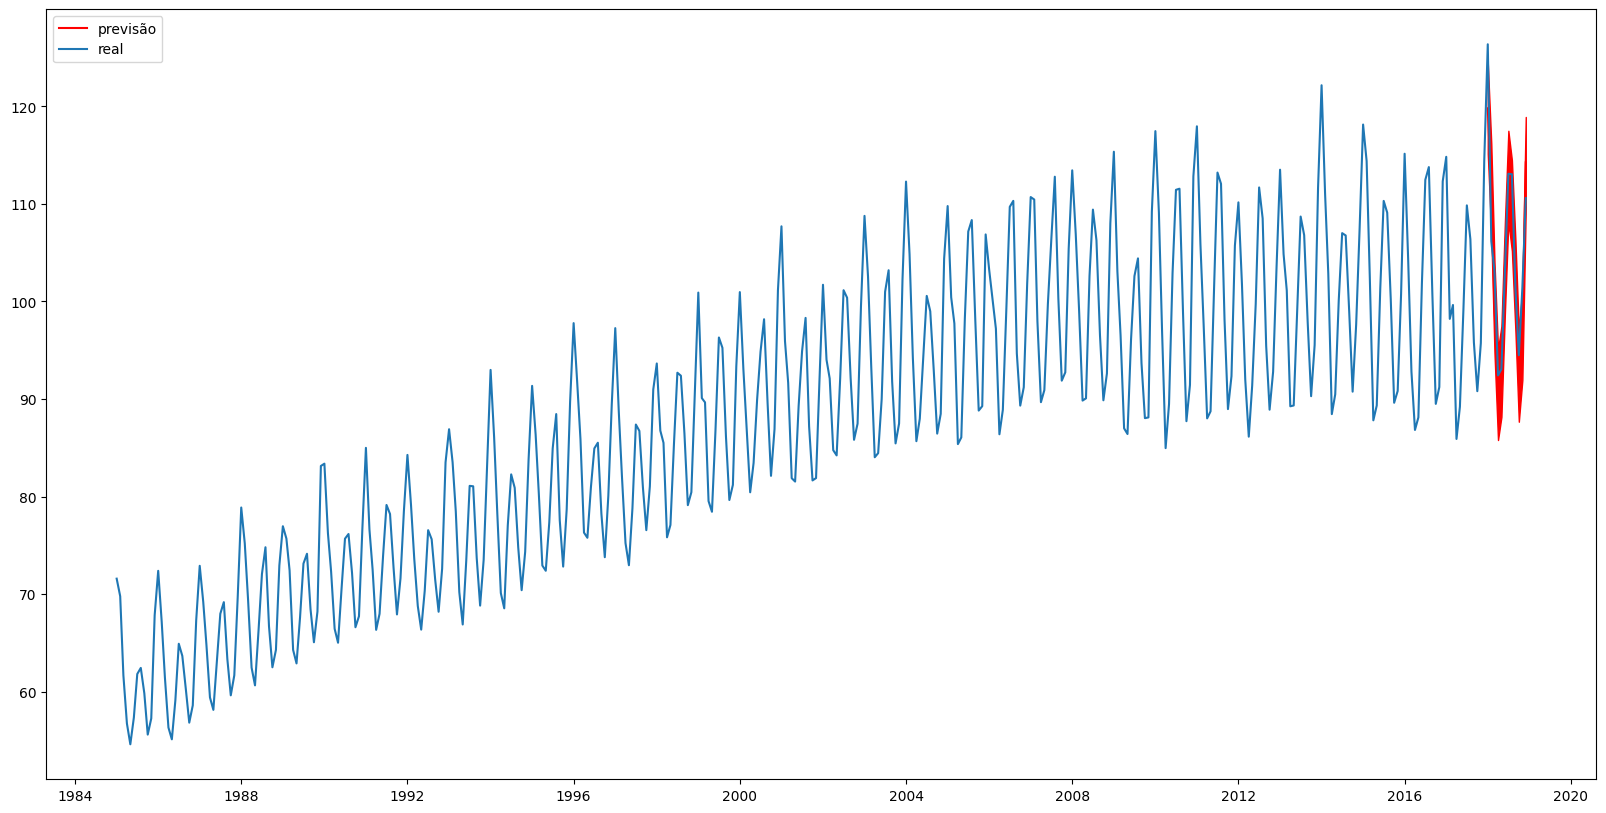

In [36]:
plt.figure(figsize=(20,10))
plt.plot(datas_previsao, predicoes_media.values, color='red', label='previsão')
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [38]:
mae = mean_absolute_error(df[-12:].values, predicoes_media.values)
print(mae)

2.7071201498891306


In [39]:
forecast = resultado_sarimax.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean
forecast_medio.size

12

In [40]:
intervalo_conf_forecast = forecast.conf_int()
intervalo_abaixo_forecast = intervalo_conf_forecast.iloc[:,0]
intervalo_acima_forecast = intervalo_conf_forecast.iloc[:,1]

intervalo_abaixo_forecast[10], intervalo_acima_forecast[10]

(91.38813005236821, 103.10930985132882)

In [42]:
forecast_medio[10]

97.24871995184851

In [45]:
datas_forecast = np.asarray(forecast_medio.index)
pred_dates = np.asarray(predicoes_media.index)

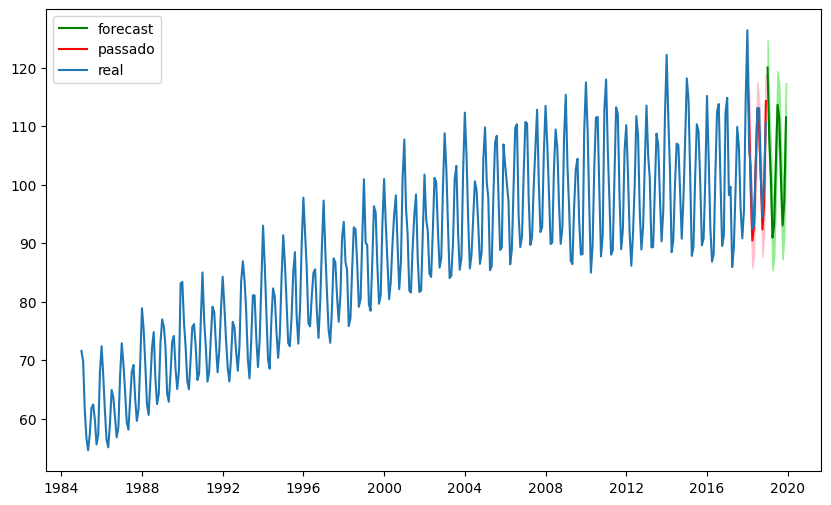

In [47]:
dates = np.asarray(df.index)
plt.figure(figsize=(10,6))
plt.plot(datas_forecast, forecast_medio, color='green', label="forecast")
plt.fill_between(datas_forecast, intervalo_abaixo_forecast, intervalo_acima_forecast, color="lightgreen")

plt.plot(datas_previsao, predicoes_media.values, color='red', label='passado')
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color='pink')

plt.plot(dates, df.values, label= 'real')
plt.legend(loc='upper left')
plt.show()